![image.png](https://i.imgur.com/a3uAqnb.png)

## **Goal:** Build a classification model to predict the rarity of pokemon cards (normal vs legendary).

# 1️⃣ Import Libraries

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import kagglehub

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 2️⃣ Load the Data

In [195]:
# Download dataset
path = kagglehub.dataset_download("rounakbanik/pokemon")
print("Path:", path)

Using Colab cache for faster access to the 'pokemon' dataset.
Path: /kaggle/input/pokemon


In [196]:
# TODO: Load the CSV file into df_pokemon


pokemon_path = os.path.join(path, 'pokemon.csv')
df_pokemon = pd.read_csv(pokemon_path)

print(f"Shape: {df_pokemon.shape}")
df_pokemon.head(10)

Shape: (801, 41)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,...,50.0,10,20,20,45,bug,NaN,2.9,1,0


# 3️⃣ EDA

In [197]:
# TODO: Check the data info and missing values
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [198]:
print(df_pokemon.isnull().sum())

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


<Axes: xlabel='is_legendary'>

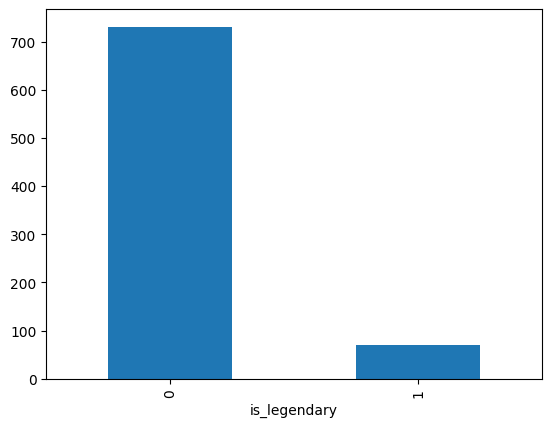

In [199]:
# TODO: Check for target imbalance
# Hint: the target column is 'is_legendary'
df_pokemon['is_legendary'].value_counts().plot(kind='bar')

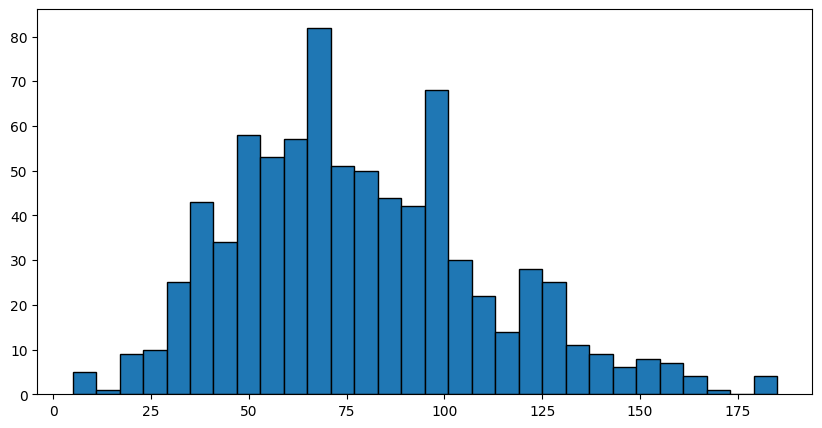

In [200]:
# TODO: Plot distribution of the stats (e.g., 'attack')
plt.figure(figsize=(10, 5))
plt.hist(df_pokemon['attack'], bins=30, edgecolor='black')
plt.show()

# 4️⃣ Data Cleaning

In [201]:
df_pokemon.shape

(801, 41)

In [202]:
# Define stat columns
stat_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# TODO: Drop rows with missing values (not encluding 'type2')
df_clean = df_pokemon.dropna(subset=stat_cols)
df_clean.shape

(801, 41)

In [203]:
# TODO: Fill missing type2
df_clean['type2'] = df_pokemon['type2'].fillna('unknown')
df_clean.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,unknown,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,unknown,19.0,1,0


In [204]:
df_clean.isnull().sum().sum()

np.int64(138)

# 5️⃣ Encode Categorical Variables

In [205]:
# TODO: Encode type1 and type2 using LabelEncoder
le = LabelEncoder()
df_clean['type1'] = le.fit_transform(df_clean['type1'])
df_clean['type2'] = le.fit_transform(df_clean['type2'])

In [206]:
df_clean[['attack', 'defense']].head()

,attack,defense
0,49,49
1,62,63
2,100,123
3,52,43
4,64,58


# 6️⃣ Feature Engineering

In [207]:
# TODO: Create total_stats feature (sum of all stat columns)
df_clean['total_stats'] = df_clean[stat_cols].sum(axis=1)

# TODO: Create attack_defense_ratio feature
df_clean['attack_defense_ratio'] = df_clean['attack'] / df_clean['defense']

In [208]:
df_clean[stat_cols+['total_stats']].head()

,hp,attack,defense,sp_attack,sp_defense,speed,total_stats
0,45,49,49,65,65,45,318
1,60,62,63,80,80,60,405
2,80,100,123,122,120,80,625
3,39,52,43,60,50,65,309
4,58,64,58,80,65,80,405


# 7️⃣ Prepare Data

In [209]:
# Define features and target
feature_cols = stat_cols + ['total_stats', 'attack_defense_ratio', 'type1', 'type2']

X = df_clean[feature_cols]
y = df_clean['is_legendary']

# TODO: Split data with stratification (test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=True,
    random_state=42,
    stratify=y
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (640, 10), Test: (161, 10)


In [210]:
# TODO: Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8️⃣ Train Model
### Challenge : Try to get > 97% F1 score

In [237]:
# TODO: Train RandomForestClassifier with class_weight='balanced'
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=35,
    class_weight='balanced'
)

# YOUR CODE HERE - fit the model
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=35, n_estimators=200)

# 9️⃣ Evaluate Model

In [238]:
# TODO: Make predictions and print accuracy
y_pred = model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Legendary']))

Accuracy: 0.9814
              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99       147
   Legendary       1.00      0.79      0.88        14

    accuracy                           0.98       161
   macro avg       0.99      0.89      0.93       161
weighted avg       0.98      0.98      0.98       161



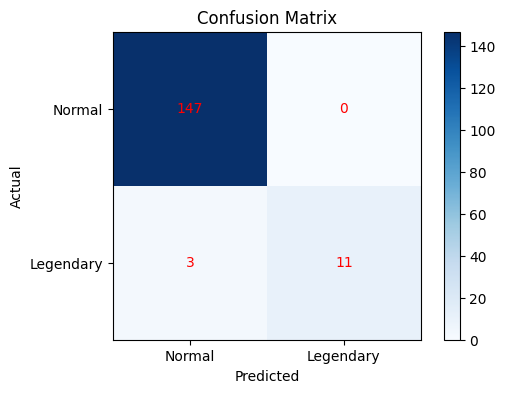

In [239]:
# TODO: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Normal', 'Legendary'])
plt.yticks([0, 1], ['Normal'
, 'Legendary'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()